In [1]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       2.1.0
accelerate                    0.33.0
adaseq                        0.6.6
addict                        2.4.0
aiohttp                       3.9.5
aiosignal                     1.3.1
alabaster                     0.7.16
albucore                      0.0.12
albumentations                1.4.11
alias-free-torch              0.0.6
aliyun-python-sdk-core        2.15.1
aliyun-python-sdk-kms         2.16.3
aniso8601                     9.0.1
annotated-types               0.7.0
antlr4-python3-runtime        4.9.3
anyio                         4.4.0
apex                          0.1
appdirs                       1.4.4
argon2-cffi                   23.1.0
argon2-cffi-bindings          21.2.0
arrow                         1.3.0
asttokens                     2.4.1
async-lru                     2.0.4
async-timeout                 4.0.3
attrdict                      2.0.1
attrs

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np


# 模拟一些二分类数据，特征维度为2，确保数据类型为float
x_data = torch.tensor([[1.0, 2.0], [2.0, 3.0], [3.0, 4.0], [4.0, 5.0], [5.0, 6.0], [6.0, 7.0]], dtype=torch.float)
y_data = torch.tensor([[0.0], [0.0], [0.0], [1.0], [1.0], [1.0]], dtype=torch.float)

In [2]:
# 定义模型
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

# 实例化模型
model = LogisticRegressionModel()

# 定义损失函数为二元交叉熵
criterion = nn.BCELoss()

# 定义优化器（这里使用SGD）
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 存储损失值以供后续绘图使用
losses = []


Epoch [1000/1000], Loss: 0.3023
Epoch [2000/1000], Loss: 0.2503
Epoch [3000/1000], Loss: 0.2179
Epoch [4000/1000], Loss: 0.1954
Epoch [5000/1000], Loss: 0.1787
Epoch [6000/1000], Loss: 0.1657
Epoch [7000/1000], Loss: 0.1552
Epoch [8000/1000], Loss: 0.1464
Epoch [9000/1000], Loss: 0.1390
Epoch [10000/1000], Loss: 0.1326


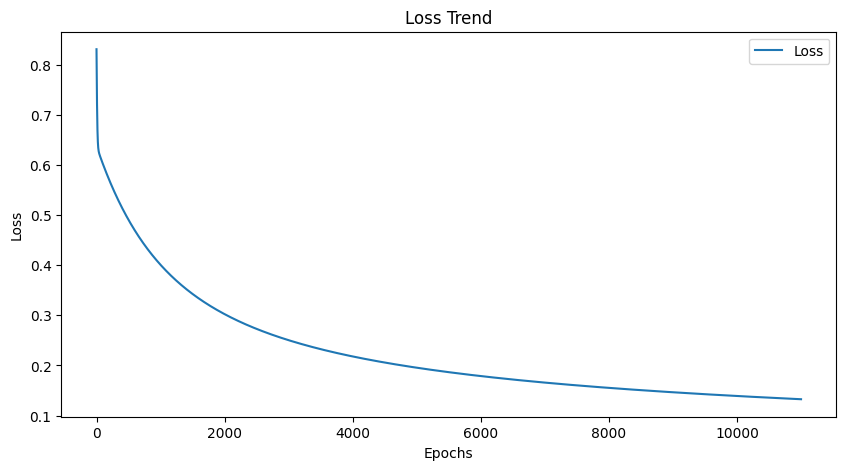

In [4]:

# 训练模型
for epoch in range(10000):
    inputs = Variable(x_data)
    targets = Variable(y_data)

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/1000], Loss: {loss.item():.4f}')

# 绘制损失曲线
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Loss')
plt.title('Loss Trend')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

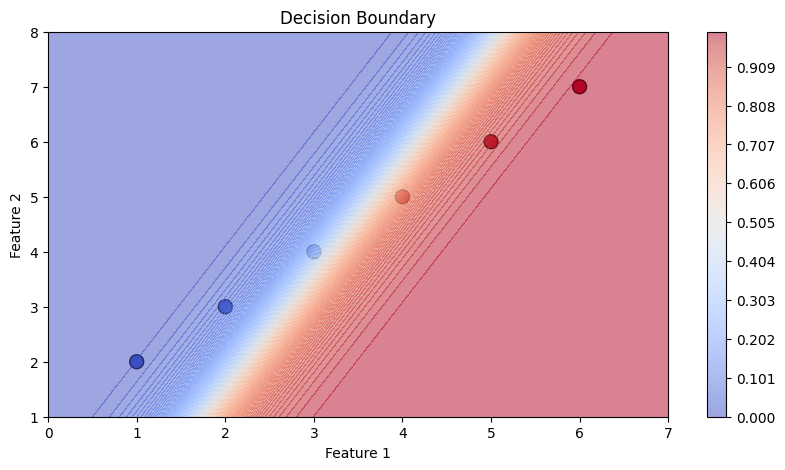

In [5]:

# 保存模型权重
torch.save(model.state_dict(), 'model_weights.pth')

# 加载模型权重
model_loaded = LogisticRegressionModel()
model_loaded.load_state_dict(torch.load('model_weights.pth'))
model_loaded.eval()

# 绘制数据点和决策边界
x_values = x_data[:, 0]
y_values = x_data[:, 1]
label = y_data[:, 0]

plt.figure(figsize=(10, 5))
plt.scatter(x_values.numpy(), y_values.numpy(), c=label.numpy(), cmap='coolwarm', edgecolor='k', s=100)

# 计算决策边界
x_min, x_max = x_values.numpy().min() - 1, x_values.numpy().max() + 1
y_min, y_max = y_values.numpy().min() - 1, y_values.numpy().max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
probs = model_loaded(grid).reshape(xx.shape)
plt.contourf(xx, yy, probs.data.numpy(), alpha=0.5, levels=np.linspace(0, 1, 100), cmap='coolwarm')
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()